# **Week 0 Main Assignment**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [254]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [255]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    data=np.loadtxt(data_path,dtype=float,delimiter=',')
    # print(data)
    return data

In [256]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if(init_centers==None):
        centers=np.array(data[0:K,:])
    else:
        centers=np.array(init_centers)
    # print(centers)
    return centers

In [257]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    labels=np.ones(data[:,0].shape)
    # print(labels)
    return labels

In [258]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distances=np.empty((len(data),len(centers)))
    # print(distances)
    for i in range(len(data)):
        distances[i]=(np.linalg.norm(data[i]-centers,axis=1))
    # print(distances)
    return distances

In [259]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    nearest_center= np.argmin(distances,axis=1)
    # print(nearest_center)
    return nearest_center

In [260]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
   new_centers=np.zeros((K,2),dtype=float)

   for i in range(K):  ## for adding the data to compute mean
      new_centers[i]= np.mean(data[np.where(i==labels)],axis=0)
   return new_centers


In [261]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1,labels2)

In [262]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [263]:
### TODO 7
def visualise(data_path, labels, centers):
    
    data=np.loadtxt(data_path,dtype=float,delimiter=',')
    # Scatter plot of the data points
    plt.scatter(data[:,0],data[:,1],c=labels,cmap='viridis',s=20)
    plt.scatter(centers[:,0],centers[:,1],s=100,c='g',marker='+')
    ### Set title as 'K-means clustering'
    plt.title("K-means clusturing")
    ### Set xlabel as 'Longitude'
    plt.xlabel("Longitude")
    ### Set ylabel as 'Latitude'
    plt.ylabel("Latitude")

    ### Save the plot as 'kmeans.png'
    plt.savefig("kmeans.png")
    # plt.show()

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0033054351806640625


<module 'matplotlib.pyplot' from 'c:\\Users\\divya\\Documents\\Winter Projects_learnings_December-2024\\Data DaVinci Project\\.venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

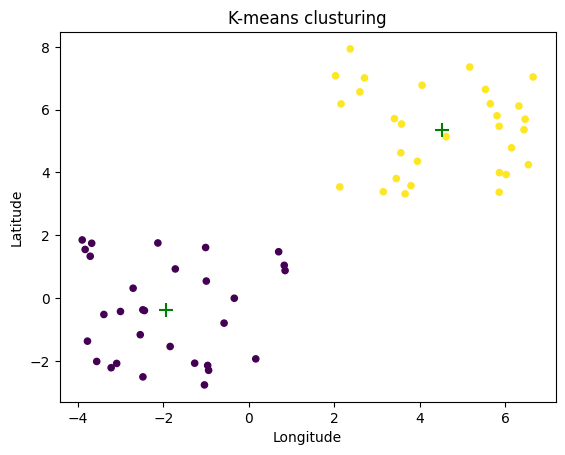

In [264]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)